### Practical Deep Learning System Performance: Final Project
#### Topic: Applications of Deep Learning in Healthcare: Breast Cancer Classification using Deep Learning models
#### Rishav Agarwal (ra3141)
#### Rachana Dereddy (rd2998)

In [102]:
import glob 
import random
from matplotlib.image import imread
import cv2
from keras.preprocessing.image import load_img, img_to_array
from numpy import concatenate
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications.resnet import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.layers import Conv2D, MaxPool2D
from keras import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.backend import learning_phase
from tensorflow import keras
from keras.layers.normalization.batch_normalization import BatchNormalization
import warnings 
warnings.filterwarnings('ignore')

In [57]:
!unzip 'data_load/12_set1.zip' -d 'data'
!unzip 'data_load/16_set2.zip' -d 'data'
!unzip 'data_load/20_set3.zip' -d 'data'
!unzip 'data_load/20_set4.zip' -d 'data'
!unzip 'data_load/20_set5.zip' -d 'data'
!unzip 'data_load/20_set5.zip' -d 'data'
!unzip 'data_load/21_set5.zip' -d 'data'
print("Data Extracted")
#!unzip '/content/gdrive/MyDrive/PractDL/data/archive.zip' -d '/content/gdrive/MyDrive/PractDL/data'

Data Extracted


In [78]:
class0 = []
class1 = []
for filename in glob.glob('data1/*/*/*.png'):
    if filename.endswith('class0.png'):
        class0.append(filename)
    else:
        class1.append(filename)

In [79]:
print("Length of class0", len(class0))
print("Length of class1", len(class1))

Length of class0 92057
Length of class1 36658


In [80]:
sampled_class0 = random.sample(class0, len(class1))
sampled_class1 = random.sample(class1, len(class1))
len(sampled_class0)

36658

In [81]:
class0_array = []
c= 0
count = 0
from numpy import savetxt
for image in sampled_class0:
    img = load_img(image)
    c = c+1
    #if(c==100):
    #    count = count+1
        #print(count+1)
        #savetxt('data.csv', class0_array, delimiter=',')
    #    c = 0
    arrayed_image = img_to_array(img)
    arrayed_image = arrayed_image.astype('uint8')
    arrayed_image = cv2.resize(arrayed_image, (50, 50), interpolation=cv2.INTER_LINEAR)
    class0_array.append([arrayed_image,0])
print(len(class0_array))

36658


In [82]:
class1_array = []
c= 0
count = 0
from numpy import savetxt
for image in sampled_class1:
    img = load_img(image)
    arrayed_image = img_to_array(img)
    arrayed_image = arrayed_image.astype('uint8')
    arrayed_image = cv2.resize(arrayed_image, (50, 50), interpolation=cv2.INTER_LINEAR)
    class1_array.append([arrayed_image,1])
print(len(class1_array))

36658


In [103]:
class0_array = np.array(class0_array)
class1_array = np.array(class1_array)
dataset1 = concatenate((class0_array,class1_array))
print("Shape of the dataset",dataset1.shape)

Shape of the dataset (73316, 2)


In [84]:
X = []
y = []

for pixels,classes in dataset1:
    X.append(pixels)
    y.append(classes)

#converting into numpy array
X = np.array(X)
y = np.array(y)
print("Shape of X:", X.shape)
print("Shape of y", y.shape)


Shape of X: (73316, 50, 50, 3)
Shape of y (73316,)


In [85]:
#train test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

#shapes of test and train
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Shape of X train:", X_train.shape)
print("Shape of X test:", X_test.shape)
print("Shape of Y train:", y_train.shape)
print("Shape of y test:", y_test.shape)

Shape of X train: (58652, 50, 50, 3)
Shape of X test: (14664, 50, 50, 3)
Shape of Y train: (58652, 2)
Shape of y test: (14664, 2)


Class Label 0:


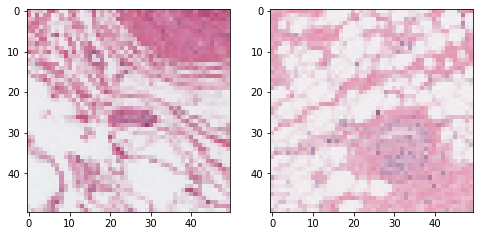

In [101]:
fig = plt.figure(figsize = (8,10))

print("Class Label 0:")
plt.subplot(1,2,1)
plt.imshow(class0_array[0][0])
plt.subplot(1,2,2)
plt.imshow(class0_array[1][0])


Class Label 1:


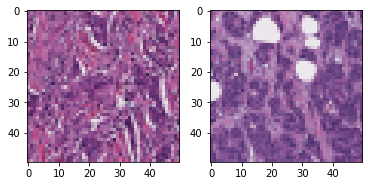

In [100]:

print("Class Label 1:")
plt.subplot(1,2,1)
plt.imshow(class1_array[0][0])
plt.subplot(1,2,2)
plt.imshow(class1_array[1][0])

### VGG16

In [108]:
#vgg-16
vgg = Sequential()
vgg.add(Conv2D(input_shape=(50,50,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Flatten())
vgg.add(Dense(4096,activation="relu"))
vgg.add(Dense(4096,activation="relu"))
vgg.add(Dense(2, activation="sigmoid"))

vgg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

vgg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 conv2d_26 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 conv2d_28 (Conv2D)          (None, 25, 25, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                 

In [109]:
history_vgg = vgg.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs= 200,
    verbose = 1,
    batch_size=250
    )

Epoch 1/200
235/235 [==============================] - 19s 79ms/step - loss: 1.1624 - accuracy: 0.5119 - val_loss: 0.6907 - val_accuracy: 0.6716
Epoch 2/200
235/235 [==============================] - 17s 73ms/step - loss: 0.6942 - accuracy: 0.5113 - val_loss: 0.6933 - val_accuracy: 0.4962
Epoch 3/200
235/235 [==============================] - 17s 73ms/step - loss: 0.6934 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 4/200
235/235 [==============================] - 17s 73ms/step - loss: 0.6932 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 5/200
235/235 [==============================] - 17s 73ms/step - loss: 0.6938 - accuracy: 0.4988 - val_loss: 0.6927 - val_accuracy: 0.6176
Epoch 6/200
235/235 [==============================] - 17s 73ms/step - loss: 0.6956 - accuracy: 0.5038 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 7/200
235/235 [==============================] - 17s 73ms/step - loss: 0.6973 - accuracy: 0.5016 - val_loss: 0.6927 - val_ac

In [111]:
history_vgg.history['val_accuracy']

[0.6716448664665222,
 0.49624931812286377,
 0.5037506818771362,
 0.5037506818771362,
 0.6175668239593506,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.5037506818771362,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.5037506818771362,
 0.5037506818771362,
 0.5037506818771362,
 0.49624931812286377,
 0.5037506818771362,
 0.5037506818771362,
 0.5037506818771362,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.5037506818771362,
 0.5037506818771362,
 0.5037506818771362,
 0.49624931812286377,
 0.49624931812286377,
 0.5037506818771362,
 0.5037506818771362,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.49624931812286377,
 0.4

### AlexNet Model

In [112]:
#alexnet
alexnet = Sequential()
alexnet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(50,50,3)))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
alexnet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2),padding='same')) 
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(4096,activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(2,activation='softmax'))

opt = keras.optimizers.SGD(learning_rate=0.01)
alexnet.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

alexnet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 10, 10, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 10, 10, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_11 (Bat  (None, 4, 4, 256)        1024      
 chNormalization)                                                
                                                      

In [113]:
history_alexnet = alexnet.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs= 200,
    verbose = 1,
    batch_size=250
    )

Epoch 1/200
235/235 [==============================] - 4s 14ms/step - loss: 0.4796 - accuracy: 0.7838 - val_loss: 0.8695 - val_accuracy: 0.5087
Epoch 2/200
235/235 [==============================] - 3s 12ms/step - loss: 0.4296 - accuracy: 0.8120 - val_loss: 0.7761 - val_accuracy: 0.6866
Epoch 3/200
235/235 [==============================] - 3s 12ms/step - loss: 0.4104 - accuracy: 0.8210 - val_loss: 0.8848 - val_accuracy: 0.6601
Epoch 4/200
235/235 [==============================] - 3s 12ms/step - loss: 0.4020 - accuracy: 0.8253 - val_loss: 0.8516 - val_accuracy: 0.7418
Epoch 5/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3917 - accuracy: 0.8295 - val_loss: 0.8910 - val_accuracy: 0.7422
Epoch 6/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3833 - accuracy: 0.8342 - val_loss: 0.5150 - val_accuracy: 0.7746
Epoch 7/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3752 - accuracy: 0.8367 - val_loss: 0.7050 - val_accuracy:

In [114]:
history_alexnet.history['val_accuracy']

[0.5086606740951538,
 0.6865794062614441,
 0.6600518226623535,
 0.7418166995048523,
 0.7422258853912354,
 0.7746180891990662,
 0.7545008063316345,
 0.7328832745552063,
 0.7427713871002197,
 0.6117703318595886,
 0.7552509307861328,
 0.5009547472000122,
 0.707378625869751,
 0.7800054550170898,
 0.7909847497940063,
 0.564170777797699,
 0.7257228493690491,
 0.6443671584129333,
 0.7414757013320923,
 0.7839607000350952,
 0.6548690795898438,
 0.6016094088554382,
 0.576309323310852,
 0.7776186466217041,
 0.7517730593681335,
 0.6906710267066956,
 0.804555356502533,
 0.762274980545044,
 0.591653048992157,
 0.6610065698623657,
 0.6267048716545105,
 0.7021958827972412,
 0.7763229608535767,
 0.6419121623039246,
 0.5735815763473511,
 0.5941080451011658,
 0.811102032661438,
 0.5307555794715881,
 0.7019912600517273,
 0.5370294451713562,
 0.5936306715011597,
 0.7022640705108643,
 0.8013502359390259,
 0.6620294451713562,
 0.7525231838226318,
 0.5787643194198608,
 0.75,
 0.7522504329681396,
 0.6990588903

### Model 3 Created

In [115]:
#building the baseline model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])


model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 47, 47, 32)        1568      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 32)          16416     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 32)        

In [116]:
history_base = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs= 200,
    verbose = 1,
    batch_size=250
    )

Epoch 1/200
235/235 [==============================] - 3s 8ms/step - loss: 1.5894 - accuracy: 0.6125 - val_loss: 0.6986 - val_accuracy: 0.5038
Epoch 2/200
235/235 [==============================] - 1s 6ms/step - loss: 0.5847 - accuracy: 0.7313 - val_loss: 0.5612 - val_accuracy: 0.7577
Epoch 3/200
235/235 [==============================] - 1s 6ms/step - loss: 0.5461 - accuracy: 0.7518 - val_loss: 0.5360 - val_accuracy: 0.7681
Epoch 4/200
235/235 [==============================] - 2s 6ms/step - loss: 0.5235 - accuracy: 0.7605 - val_loss: 0.5268 - val_accuracy: 0.7700
Epoch 5/200
235/235 [==============================] - 2s 7ms/step - loss: 0.5170 - accuracy: 0.7649 - val_loss: 0.5340 - val_accuracy: 0.7585
Epoch 6/200
235/235 [==============================] - 1s 6ms/step - loss: 0.5079 - accuracy: 0.7704 - val_loss: 0.5679 - val_accuracy: 0.7169
Epoch 7/200
235/235 [==============================] - 1s 6ms/step - loss: 0.5042 - accuracy: 0.7715 - val_loss: 0.5084 - val_accuracy: 0.7755

In [122]:
history_base.history['val_accuracy']

[0.5038188695907593,
 0.7577059268951416,
 0.768139660358429,
 0.7700490951538086,
 0.7584561109542847,
 0.7169257998466492,
 0.7755046486854553,
 0.74965900182724,
 0.7850518226623535,
 0.7699809074401855,
 0.7181532979011536,
 0.7502727508544922,
 0.7633660435676575,
 0.7450900077819824,
 0.7945308089256287,
 0.7641844153404236,
 0.7938488721847534,
 0.7695717215538025,
 0.7969858050346375,
 0.7399072647094727,
 0.7528641819953918,
 0.7699809074401855,
 0.7845062613487244,
 0.7755046486854553,
 0.7943944334983826,
 0.7110611200332642,
 0.7412029504776001,
 0.6258864998817444,
 0.7233360409736633,
 0.7118112444877625,
 0.7257910370826721,
 0.7298145294189453,
 0.8064647912979126,
 0.7597517967224121,
 0.7186306715011597,
 0.777073085308075,
 0.7557283043861389,
 0.7184260487556458,
 0.5765138864517212,
 0.7873022556304932,
 0.8074877262115479,
 0.7416121363639832,
 0.7931669354438782,
 0.7118794322013855,
 0.7764593362808228,
 0.7732542157173157,
 0.8061920404434204,
 0.79964536428451

### Transfer Learning Model on ResNet50

In [117]:
res50_model = ResNet50(input_shape = (50,50,3),weights=None,classes=2)

#Learning Rate: 0.001
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 180:
        lr *= 0.001
    elif epoch > 120:
        lr *= 0.01
    elif epoch > 60:
        lr *= 0.1
    print('Learning rate: ', lr)
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False, name="SGD")
res50_model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
res50_model.layers[0].trainable = False
history_tl = res50_model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=1, callbacks=[lr_scheduler])

Learning rate:  0.001
Epoch 1/200
917/917 [==============================] - 36s 35ms/step - loss: 0.5849 - accuracy: 0.7168 - val_loss: 0.5850 - val_accuracy: 0.7381 - lr: 0.0010
Learning rate:  0.001
Epoch 2/200
917/917 [==============================] - 31s 33ms/step - loss: 0.5024 - accuracy: 0.7734 - val_loss: 0.5329 - val_accuracy: 0.7810 - lr: 0.0010
Learning rate:  0.001
Epoch 3/200
917/917 [==============================] - 31s 33ms/step - loss: 0.4734 - accuracy: 0.7898 - val_loss: 0.4633 - val_accuracy: 0.7932 - lr: 0.0010
Learning rate:  0.001
Epoch 4/200
917/917 [==============================] - 31s 33ms/step - loss: 0.4561 - accuracy: 0.7974 - val_loss: 0.5584 - val_accuracy: 0.7857 - lr: 0.0010
Learning rate:  0.001
Epoch 5/200
917/917 [==============================] - 31s 33ms/step - loss: 0.4397 - accuracy: 0.8045 - val_loss: 0.4458 - val_accuracy: 0.8024 - lr: 0.0010
Learning rate:  0.001
Epoch 6/200
917/917 [==============================] - 31s 33ms/step - loss: 0

In [118]:
history_tl.history['val_accuracy']

[0.7381342053413391,
 0.7810283899307251,
 0.7931669354438782,
 0.7856655716896057,
 0.8024413585662842,
 0.8056464791297913,
 0.8083742260932922,
 0.8033960461616516,
 0.7397708892822266,
 0.8212629556655884,
 0.8267185091972351,
 0.8181260228157043,
 0.826309323310852,
 0.7786415815353394,
 0.8298554420471191,
 0.8272640705108643,
 0.8314238786697388,
 0.8196945190429688,
 0.8277413845062256,
 0.7795280814170837,
 0.8148527145385742,
 0.7642526030540466,
 0.8130114674568176,
 0.7955537438392639,
 0.8179214596748352,
 0.8053737282752991,
 0.8048281669616699,
 0.8147845268249512,
 0.8209219574928284,
 0.8028505444526672,
 0.7749590873718262,
 0.7993726134300232,
 0.8103519082069397,
 0.8150572776794434,
 0.8051691055297852,
 0.8106928467750549,
 0.8042826056480408,
 0.7697763442993164,
 0.7401800155639648,
 0.768207848072052,
 0.807692289352417,
 0.8007364869117737,
 0.817307710647583,
 0.8165575265884399,
 0.7326786518096924,
 0.8051009178161621,
 0.7841653227806091,
 0.78525638580322

In [40]:
df2 = pd.read_csv("Accuracy_P100.csv")

In [52]:
print("Accuracy for P100")
df2

Accuracy for P100


,VGG16,AlexNet,Model-3,Transfer Learning (ResNet50)
0,0.486498,0.512658,0.570464,0.489030
1,0.486498,0.510127,0.760338,0.595781
2,0.486498,0.523207,0.712658,0.732068
3,0.486498,0.564135,0.777637,0.727426
4,0.486498,0.566245,0.785654,0.655696
...,...,...,...,...
195,0.486498,0.812236,0.809705,0.828692
196,0.486498,0.810127,0.808439,0.828270
197,0.486498,0.801688,0.810127,0.827848
198,0.486498,0.808439,0.797890,0.827848


In [48]:
df.to_csv("Accuracy_V100.csv", index = False)

In [53]:
print("Accuracy for V100")
df

Accuracy for V100


,VGG16,AlexNet,Model-3,Transfer Learning (ResNet50)
0,0.671645,0.508661,0.503819,0.738134
1,0.496249,0.686579,0.757706,0.781028
2,0.503751,0.660052,0.768140,0.793167
3,0.503751,0.741817,0.770049,0.785666
4,0.617567,0.742226,0.758456,0.802441
...,...,...,...,...
195,0.496249,0.803464,0.786279,0.823582
196,0.496249,0.784438,0.752387,0.824536
197,0.496249,0.802237,0.804692,0.823104
198,0.496249,0.763912,0.762957,0.822149


In [54]:
import matplotlib.pyplot as plt
def plot_epochs():
    val_acc = df2["Model-3"]
    val_acc1 = df2["AlexNet"]
    val_acc2 = df2["Transfer Learning (ResNet50)"]
    val_acc3 = df2["VGG16"]
    
    epochs = range(len(val_acc))
    fig,ax = plt.subplots(2,1 , figsize=(5, 10))
    ax[0].set_title('Accuracy vs Epochs P100')
    
    ax[0].plot(epochs, val_acc3, color='green', label='VGG')
    ax[0].plot(epochs, val_acc1, color='orange', label='AlexNet')
    ax[0].plot(epochs, val_acc, color='blue', label='Model3')
    ax[0].plot(epochs, val_acc2, color='red', label='TL')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    
    val_acc = df["Model-3"]
    val_acc1 = df["AlexNet"]
    val_acc2 = df["Transfer Learning (ResNet50)"]
    val_acc3 = df["VGG16"]
    
    ax[1].set_title('Accuracy vs Epochs V100')
    
    ax[1].plot(epochs, val_acc3, color='green', label='VGG')
    ax[1].plot(epochs, val_acc1, color='orange', label='AlexNet')
    ax[1].plot(epochs, val_acc, color='blue', label='Model3')
    ax[1].plot(epochs, val_acc2, color='red', label='TL')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

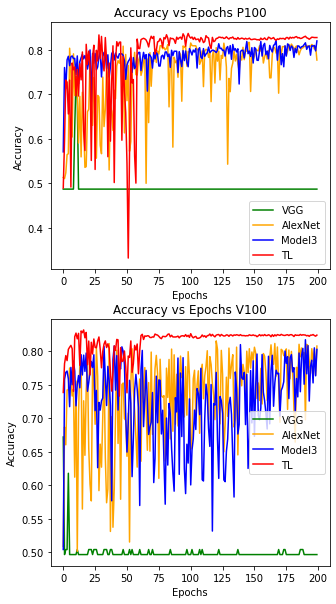

In [55]:
plot_epochs()